### Webscraping Movie Rating Analysis

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import time
import requests
import warnings

In [2]:
url='https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

In [3]:
response = requests.get(url)

In [4]:
response.status_code

200

### Extracting the HTML code from the page

In [5]:
soup = BeautifulSoup(response.text, "html.parser")

### Creating lists to store the movie details

In [6]:
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
description = []
director = []
stars = []

### Code

In [7]:
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

In [8]:
for store in movie_data:
    name = store.h3.a.text
    movie_name.append(name)
    
    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    time.append(runtime)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '00'
    metascore.append(meta)
     
    describe = store.find_all('p', class_ = 'text-muted')
    description_ = describe[1].text.replace('\n', '') if len(describe) >1 else 'np.NaN'
    description.append(description_)
    
    cast = store.find("p", class_ = '')
    cast = cast.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["director:", "stars:"])]
    director.append(cast[0])
    stars.append([x.strip() for x in cast[1].split(",")])
     
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value) >1 else '0'
    gross.append(grosses)

### Creating a DataFrame to store in csv file

In [9]:
df = pd.DataFrame({'Name': movie_name, 'Year': year, 'Time': time, 'Rating': rating, 'Metascore': metascore, 'Description': description, "Director": director, 'Stars': stars, 'Votes': votes, 'Gross': gross})


In [10]:
df.to_csv('IMDb Webscraping.csv',index=False)

In [11]:
import pandas as pd
df=pd.read_csv('IMDb Webscraping.csv')

In [12]:
df

Name  Year  Time  Rating  \
0                        The Shawshank Redemption  1994   142     9.3   
1                                   The Godfather  1972   175     9.2   
2                                 The Dark Knight  2008   152     9.0   
3   The Lord of the Rings: The Return of the King  2003   201     9.0   
4                                Schindler's List  1993   195     9.0   
..                                            ...   ...   ...     ...   
95                                   Sunset Blvd.  1950   110     8.4   
96                             The Great Dictator  1940   125     8.4   
97                                       Ratsasan  2018   170     8.3   
98                      Ayla: The Daughter of War  2017   125     8.3   
99                                   Vikram Vedha  2017   147     8.3   

    Metascore                                        Description  \
0          81  Two imprisoned men bond over a number of years...   
1         100  The aging patriarch of an organized crime dyna...   
2          84  When the menace known as the Joker wreaks havo...   
3          94  Gandalf and Aragorn lead the World of Men agai...   
4          94  In German-occupied Poland during World War II,...   
..        ...                                                ...   
95          0  A screenwriter develops a dangerous relationsh...   
96          0  Dictator Adenoid Hynkel tries to expand his em...   
97          0  A sub-inspector sets out in pursuit of a myste...   
98          0  In 1950, amid-st the ravages of the Korean War...   
99          0  Vikram, a no-nonsense police officer, accompan...   

                                        Director  \
0                        Director:Frank Darabont   
1                  Director:Francis Ford Coppola   
2                     Director:Christopher Nolan   
3                         Director:Peter Jackson   
4                      Director:Steven Spielberg   
..                                           ...   
95                         Director:Billy Wilder   
96                      Director:Charles Chaplin   
97                            Director:Ram Kumar   
98                            Director:Can Ulkay   
99  Directors:Gayatri, Pushkar, Gowtham Selvaraj   

                                                Stars      Votes     Gross  
0   ['Stars:Tim Robbins', 'Morgan Freeman', 'Bob G...  2,651,338   $28.34M  
1   ['Stars:Marlon Brando', 'Al Pacino', 'James Ca...  1,837,910  $134.97M  
2   ['Stars:Christian Bale', 'Heath Ledger', 'Aaro...  2,623,490  $534.86M  
3   ['Stars:Elijah Wood', 'Viggo Mortensen', 'Ian ...  1,827,221  $377.85M  
4   ['Stars:Liam Neeson', 'Ralph Fiennes', 'Ben Ki...  1,343,546   $96.90M  
..                                                ...        ...       ...  
95  ['Stars:William Holden', 'Gloria Swanson', 'Er...    221,517       #59  
96  ['Stars:Charles Chaplin', 'Paulette Goddard', ...    223,511    $0.29M  
97  ['Stars:Vishnu Vishal', 'Amala Paul', 'Radha R...     44,116         0  
98  ['Stars:Çetin Tekindor', 'Ismail Hacioglu', 'K...     39,837         0  
99  ['Stars:Madhavan', 'Vijay Sethupathi', 'Shradd...     44,096         0  

[100 rows x 10 columns]

In [13]:
len(movie_name)

100

In [14]:
df.shape

(100, 10)

In [15]:
df['Votes'] = df['Votes'].apply(lambda store:store.replace(',','').replace(',','')).astype(float)

In [16]:
df['Gross'] = df['Gross'].apply(lambda store:store.replace('$','').replace('M',''))

In [17]:
df

Name  Year  Time  Rating  \
0                        The Shawshank Redemption  1994   142     9.3   
1                                   The Godfather  1972   175     9.2   
2                                 The Dark Knight  2008   152     9.0   
3   The Lord of the Rings: The Return of the King  2003   201     9.0   
4                                Schindler's List  1993   195     9.0   
..                                            ...   ...   ...     ...   
95                                   Sunset Blvd.  1950   110     8.4   
96                             The Great Dictator  1940   125     8.4   
97                                       Ratsasan  2018   170     8.3   
98                      Ayla: The Daughter of War  2017   125     8.3   
99                                   Vikram Vedha  2017   147     8.3   

    Metascore                                        Description  \
0          81  Two imprisoned men bond over a number of years...   
1         100  The aging patriarch of an organized crime dyna...   
2          84  When the menace known as the Joker wreaks havo...   
3          94  Gandalf and Aragorn lead the World of Men agai...   
4          94  In German-occupied Poland during World War II,...   
..        ...                                                ...   
95          0  A screenwriter develops a dangerous relationsh...   
96          0  Dictator Adenoid Hynkel tries to expand his em...   
97          0  A sub-inspector sets out in pursuit of a myste...   
98          0  In 1950, amid-st the ravages of the Korean War...   
99          0  Vikram, a no-nonsense police officer, accompan...   

                                        Director  \
0                        Director:Frank Darabont   
1                  Director:Francis Ford Coppola   
2                     Director:Christopher Nolan   
3                         Director:Peter Jackson   
4                      Director:Steven Spielberg   
..                                           ...   
95                         Director:Billy Wilder   
96                      Director:Charles Chaplin   
97                            Director:Ram Kumar   
98                            Director:Can Ulkay   
99  Directors:Gayatri, Pushkar, Gowtham Selvaraj   

                                                Stars      Votes   Gross  
0   ['Stars:Tim Robbins', 'Morgan Freeman', 'Bob G...  2651338.0   28.34  
1   ['Stars:Marlon Brando', 'Al Pacino', 'James Ca...  1837910.0  134.97  
2   ['Stars:Christian Bale', 'Heath Ledger', 'Aaro...  2623490.0  534.86  
3   ['Stars:Elijah Wood', 'Viggo Mortensen', 'Ian ...  1827221.0  377.85  
4   ['Stars:Liam Neeson', 'Ralph Fiennes', 'Ben Ki...  1343546.0   96.90  
..                                                ...        ...     ...  
95  ['Stars:William Holden', 'Gloria Swanson', 'Er...   221517.0     #59  
96  ['Stars:Charles Chaplin', 'Paulette Goddard', ...   223511.0    0.29  
97  ['Stars:Vishnu Vishal', 'Amala Paul', 'Radha R...    44116.0       0  
98  ['Stars:Çetin Tekindor', 'Ismail Hacioglu', 'K...    39837.0       0  
99  ['Stars:Madhavan', 'Vijay Sethupathi', 'Shradd...    44096.0       0  

[100 rows x 10 columns]

### Data Cleaning

In [18]:
df['Year']=df['Year'].replace({"I":""},regex=True)

In [19]:
df['Year']=df['Year'].astype(int)

In [20]:
df['Time']=df['Time'].replace({"I ":""},regex=True)

In [21]:
df['Time']=df['Time'].astype(int)

In [22]:
df['Gross']=df['Gross'].replace({"#":""},regex=True)

In [23]:
df['Gross']=df['Gross'].astype(float)

In [24]:
df['Rating']=df['Rating'].replace({"I ":""},regex=True)

In [25]:
df['Rating']=df['Rating'].astype(float)

In [26]:
df['Metascore']=df['Metascore'].replace({"I ":""},regex=True)

In [27]:
df['Metascore']=df['Metascore'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   Year         100 non-null    int32  
 2   Time         100 non-null    int32  
 3   Rating       100 non-null    float64
 4   Metascore    100 non-null    int32  
 5   Description  100 non-null    object 
 6   Director     100 non-null    object 
 7   Stars        100 non-null    object 
 8   Votes        100 non-null    float64
 9   Gross        100 non-null    float64
dtypes: float64(3), int32(3), object(4)
memory usage: 6.8+ KB


In [29]:
df.isnull()

Name   Year   Time  Rating  Metascore  Description  Director  Stars  \
0   False  False  False   False      False        False     False  False   
1   False  False  False   False      False        False     False  False   
2   False  False  False   False      False        False     False  False   
3   False  False  False   False      False        False     False  False   
4   False  False  False   False      False        False     False  False   
..    ...    ...    ...     ...        ...          ...       ...    ...   
95  False  False  False   False      False        False     False  False   
96  False  False  False   False      False        False     False  False   
97  False  False  False   False      False        False     False  False   
98  False  False  False   False      False        False     False  False   
99  False  False  False   False      False        False     False  False   

    Votes  Gross  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  
..    ...    ...  
95  False  False  
96  False  False  
97  False  False  
98  False  False  
99  False  False  

[100 rows x 10 columns]

<AxesSubplot:>

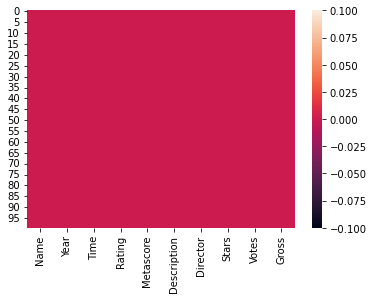

In [30]:
sns.heatmap(df.isnull())

In [31]:
per_missing = df.isnull().sum()*100 / len(df)

In [32]:
per_missing

Name           0.0
Year           0.0
Time           0.0
Rating         0.0
Metascore      0.0
Description    0.0
Director       0.0
Stars          0.0
Votes          0.0
Gross          0.0
dtype: float64

In [33]:
df.dropna(axis=0)

Name  Year  Time  Rating  \
0                        The Shawshank Redemption  1994   142     9.3   
1                                   The Godfather  1972   175     9.2   
2                                 The Dark Knight  2008   152     9.0   
3   The Lord of the Rings: The Return of the King  2003   201     9.0   
4                                Schindler's List  1993   195     9.0   
..                                            ...   ...   ...     ...   
95                                   Sunset Blvd.  1950   110     8.4   
96                             The Great Dictator  1940   125     8.4   
97                                       Ratsasan  2018   170     8.3   
98                      Ayla: The Daughter of War  2017   125     8.3   
99                                   Vikram Vedha  2017   147     8.3   

    Metascore                                        Description  \
0          81  Two imprisoned men bond over a number of years...   
1         100  The aging patriarch of an organized crime dyna...   
2          84  When the menace known as the Joker wreaks havo...   
3          94  Gandalf and Aragorn lead the World of Men agai...   
4          94  In German-occupied Poland during World War II,...   
..        ...                                                ...   
95          0  A screenwriter develops a dangerous relationsh...   
96          0  Dictator Adenoid Hynkel tries to expand his em...   
97          0  A sub-inspector sets out in pursuit of a myste...   
98          0  In 1950, amid-st the ravages of the Korean War...   
99          0  Vikram, a no-nonsense police officer, accompan...   

                                        Director  \
0                        Director:Frank Darabont   
1                  Director:Francis Ford Coppola   
2                     Director:Christopher Nolan   
3                         Director:Peter Jackson   
4                      Director:Steven Spielberg   
..                                           ...   
95                         Director:Billy Wilder   
96                      Director:Charles Chaplin   
97                            Director:Ram Kumar   
98                            Director:Can Ulkay   
99  Directors:Gayatri, Pushkar, Gowtham Selvaraj   

                                                Stars      Votes   Gross  
0   ['Stars:Tim Robbins', 'Morgan Freeman', 'Bob G...  2651338.0   28.34  
1   ['Stars:Marlon Brando', 'Al Pacino', 'James Ca...  1837910.0  134.97  
2   ['Stars:Christian Bale', 'Heath Ledger', 'Aaro...  2623490.0  534.86  
3   ['Stars:Elijah Wood', 'Viggo Mortensen', 'Ian ...  1827221.0  377.85  
4   ['Stars:Liam Neeson', 'Ralph Fiennes', 'Ben Ki...  1343546.0   96.90  
..                                                ...        ...     ...  
95  ['Stars:William Holden', 'Gloria Swanson', 'Er...   221517.0   59.00  
96  ['Stars:Charles Chaplin', 'Paulette Goddard', ...   223511.0    0.29  
97  ['Stars:Vishnu Vishal', 'Amala Paul', 'Radha R...    44116.0    0.00  
98  ['Stars:Çetin Tekindor', 'Ismail Hacioglu', 'K...    39837.0    0.00  
99  ['Stars:Madhavan', 'Vijay Sethupathi', 'Shradd...    44096.0    0.00  

[100 rows x 10 columns]

In [34]:
df.describe(include='all')

Name         Year        Time      Rating  \
count                        100   100.000000  100.000000  100.000000   
unique                       100          NaN         NaN         NaN   
top     The Shawshank Redemption          NaN         NaN         NaN   
freq                           1          NaN         NaN         NaN   
mean                         NaN  1994.300000  139.040000    8.550000   
std                          NaN    23.201141   27.945083    0.200252   
min                          NaN  1931.000000   87.000000    8.300000   
25%                          NaN  1980.750000  117.000000    8.400000   
50%                          NaN  1999.000000  138.000000    8.500000   
75%                          NaN  2014.500000  160.000000    8.600000   
max                          NaN  2022.000000  207.000000    9.300000   

         Metascore                                        Description  \
count   100.000000                                                100   
unique         NaN                                                100   
top            NaN  Two imprisoned men bond over a number of years...   
freq           NaN                                                  1   
mean     67.030000                                                NaN   
std      34.123796                                                NaN   
min       0.000000                                                NaN   
25%      64.750000                                                NaN   
50%      80.500000                                                NaN   
75%      90.000000                                                NaN   
max     100.000000                                                NaN   

                          Director  \
count                          100   
unique                          70   
top     Director:Christopher Nolan   
freq                             6   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                                    Stars         Votes  \
count                                                 100  1.000000e+02   
unique                                                100           NaN   
top     ['Stars:Tim Robbins', 'Morgan Freeman', 'Bob G...           NaN   
freq                                                    1           NaN   
mean                                                  NaN  8.167948e+05   
std                                                   NaN  6.591573e+05   
min                                                   NaN  2.909000e+04   
25%                                                   NaN  2.230125e+05   
50%                                                   NaN  7.533400e+05   
75%                                                   NaN  1.254690e+06   
max                                                   NaN  2.651338e+06   

             Gross  
count   100.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean    107.296100  
std     152.558128  
min       0.000000  
25%       4.855000  
50%      46.420000  
75%     143.302500  
max     858.370000

### Data Analysis

In [35]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

### Displaying Year with highest average votes

In [38]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [39]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2010    2.325204e+06
2008    1.865268e+06
1972    1.837910e+06
1994    1.786748e+06
2012    1.612359e+06
1999    1.607154e+06
2000    1.357690e+06
1977    1.353780e+06
1993    1.343546e+06
2014    1.320540e+06
2001    1.304346e+06
1974    1.259363e+06
1991    1.253942e+06
1995    1.247630e+06
1998    1.246604e+06
2003    1.201078e+06
1990    1.148833e+06
1980    1.145966e+06
2002    1.075503e+06
2006    1.007835e+06
1975    1.000989e+06
2011    8.500270e+05
1979    7.691180e+05
1966    7.564030e+05
1986    7.132860e+05
1960    6.671330e+05
2019    6.411842e+05
1985    6.351345e+05
1981    6.051835e+05
1942    5.687490e+05
1997    5.408435e+05
1964    4.890260e+05
1946    4.527590e+05
1954    4.169410e+05
1984    3.997550e+05
2009    3.977780e+05
1957    3.683793e+05
2018    3.490990e+05
1968    3.282200e+05
1988    2.675235e+05
2016    2.642480e+05
1936    2.417210e+05
1940    2.235110e+05
1950    2.215170e+05
2017    1.942790e+05
2007    1.929980e+05
1931    1.844640e+05
2022    

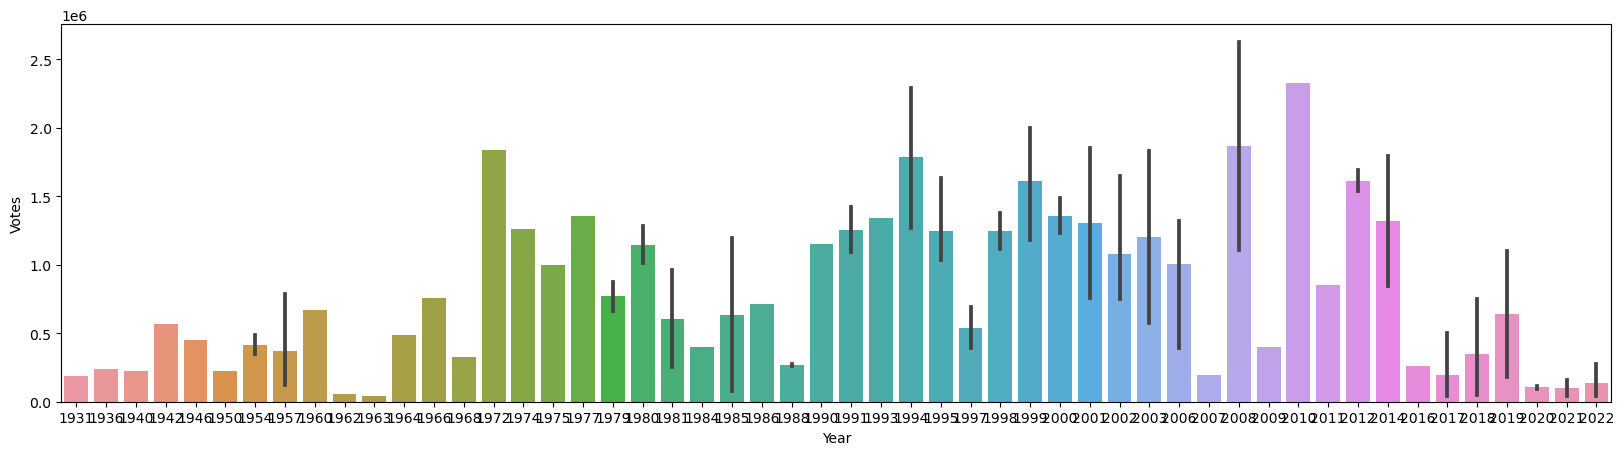

In [40]:
plt.figure(dpi = 100, figsize=(20,5))
sns.barplot(x = df["Year"], y = df["Votes"])
plt.show()

### Average Rating per year

In [41]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [42]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
1972    9.200000
1993    9.000000
1974    9.000000
2010    8.800000
1994    8.800000
1966    8.800000
2008    8.700000
2003    8.700000
1990    8.700000
1975    8.700000
2001    8.700000
2002    8.633333
1999    8.625000
1991    8.600000
1962    8.600000
1946    8.600000
1957    8.600000
1977    8.600000
1998    8.550000
1954    8.550000
1980    8.550000
2014    8.550000
2020    8.550000
2021    8.525000
2022    8.520000
1988    8.500000
1979    8.500000
1942    8.500000
2011    8.500000
1960    8.500000
1936    8.500000
1968    8.500000
1931    8.500000
1997    8.500000
1995    8.500000
2006    8.466667
2019    8.460000
2000    8.450000
1985    8.450000
1963    8.400000
2009    8.400000
1964    8.400000
1981    8.400000
2012    8.400000
1950    8.400000
2016    8.400000
2018    8.400000
1984    8.400000
1986    8.400000
1940    8.400000
2007    8.400000
2017    8.333333
Name: Rating, dtype: float64

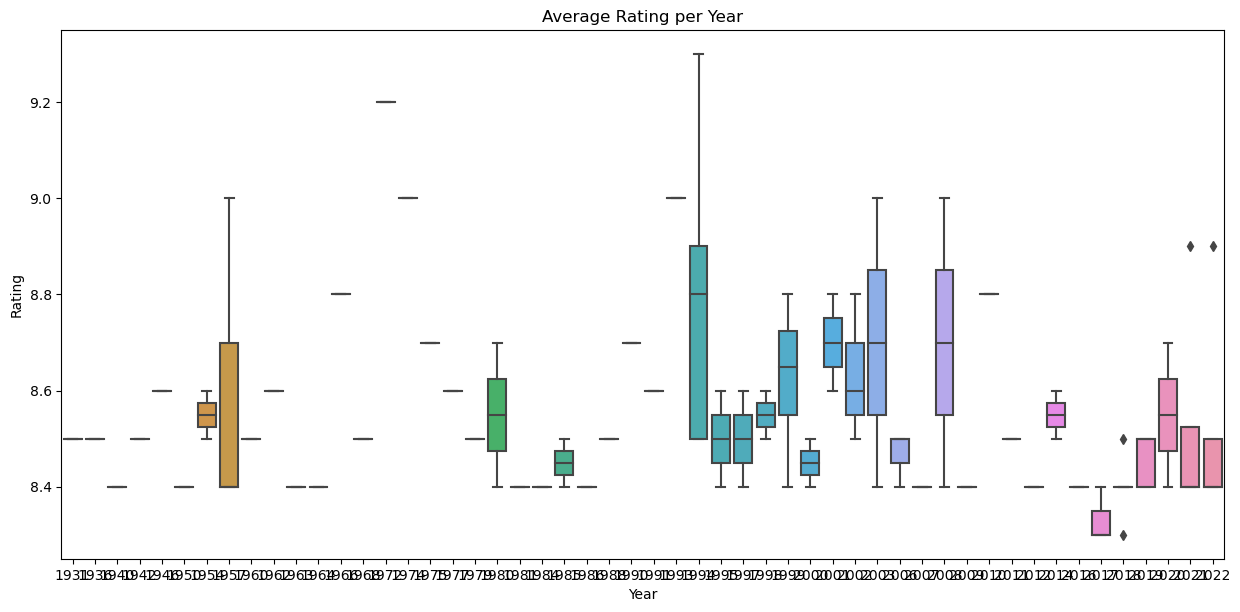

In [43]:
plt.figure(dpi = 100, figsize=(15,7))
sns.boxplot(x = df["Year"], y = df["Rating"])
plt.title('Average Rating per Year')
plt.show()

### Top 10 lengthy movies name and runtime

In [44]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [45]:
df.nlargest(10,'Time')[['Name','Time']]

Name  Time
32                               Shichinin no samurai   207
5                               The Godfather Part II   202
3       The Lord of the Rings: The Return of the King   201
4                                    Schindler's List   195
25                                     The Green Mile   189
66                                  Avengers: Endgame   181
11              The Lord of the Rings: The Two Towers   179
13  The Lord of the Rings: The Fellowship of the Ring   178
84                                         Braveheart   178
1                                       The Godfather   175

In [46]:
Top10=df.nlargest(10,'Time')[['Name','Time']].set_index('Name')

In [47]:
Top10

Time
Name                                                   
Shichinin no samurai                                207
The Godfather Part II                               202
The Lord of the Rings: The Return of the King       201
Schindler's List                                    195
The Green Mile                                      189
Avengers: Endgame                                   181
The Lord of the Rings: The Two Towers               179
The Lord of the Rings: The Fellowship of the Ring   178
Braveheart                                          178
The Godfather                                       175

### Displaying number of movies per year

In [48]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [49]:
df['Year'].value_counts()

1994    5
2019    5
2018    5
2022    5
2021    4
1999    4
2017    3
2002    3
2006    3
1957    3
1995    3
1997    2
2000    2
1988    2
1985    2
1979    2
2012    2
1954    2
1991    2
2014    2
1998    2
2020    2
2008    2
2003    2
2001    2
1981    2
1980    2
1984    1
1936    1
2009    1
1963    1
1964    1
1950    1
2007    1
1986    1
2016    1
1931    1
1946    1
1942    1
1960    1
1968    1
2011    1
1972    1
1962    1
1977    1
1975    1
1990    1
1966    1
2010    1
1974    1
1993    1
1940    1
Name: Year, dtype: int64

### Most popular movie name(as per highest gross)

In [50]:
df.columns

Index(['Name', 'Year', 'Time', 'Rating', 'Metascore', 'Description',
       'Director', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [51]:
df[df['Gross'].max()==df['Gross']]['Name']

66    Avengers: Endgame
Name: Name, dtype: object

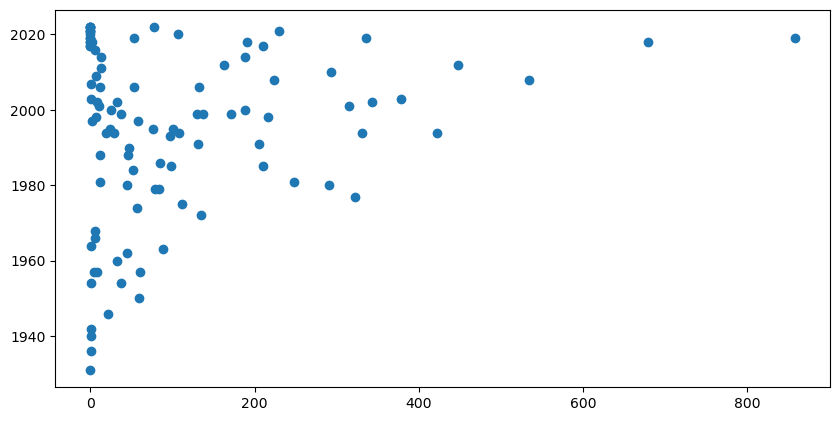

In [52]:
plt.figure(dpi = 100, figsize=(10,5))
plt.scatter(x = df['Gross'], y = df['Year'])
plt.show()

### Checking the Distribution of the Gross Columns

(array([63., 14., 10.,  7.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([  0.   ,  85.837, 171.674, 257.511, 343.348, 429.185, 515.022,
        600.859, 686.696, 772.533, 858.37 ]),
 <BarContainer object of 10 artists>)

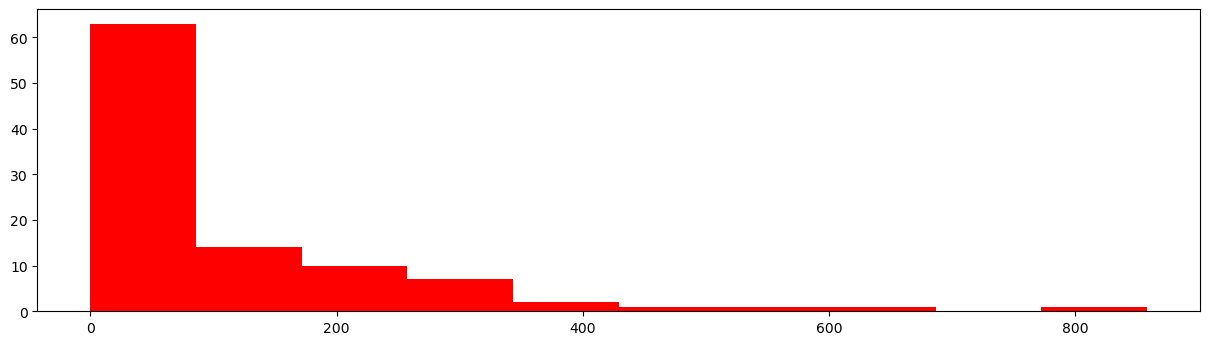

In [53]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(df.Gross, color = 'r')

<AxesSubplot:ylabel='Frequency'>

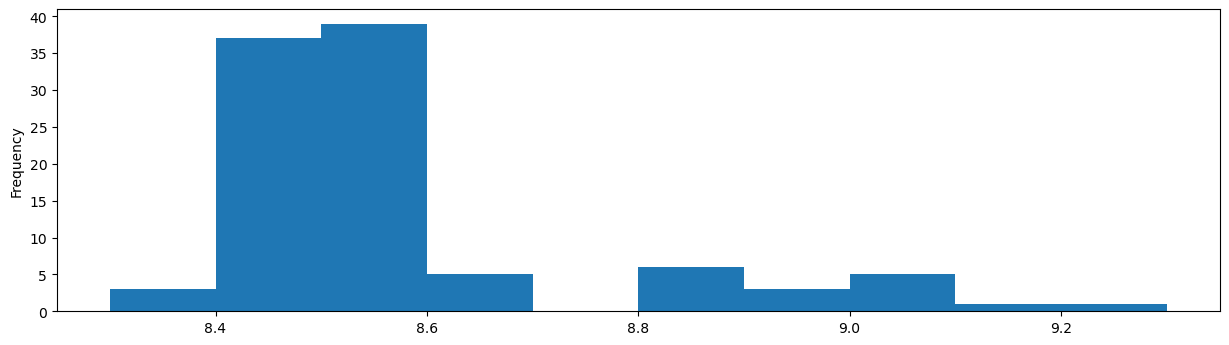

In [54]:
plt.figure(dpi = 100, figsize=(15,4))
df.groupby(['Name'])['Rating'].max().plot(kind = 'hist')

<AxesSubplot:>

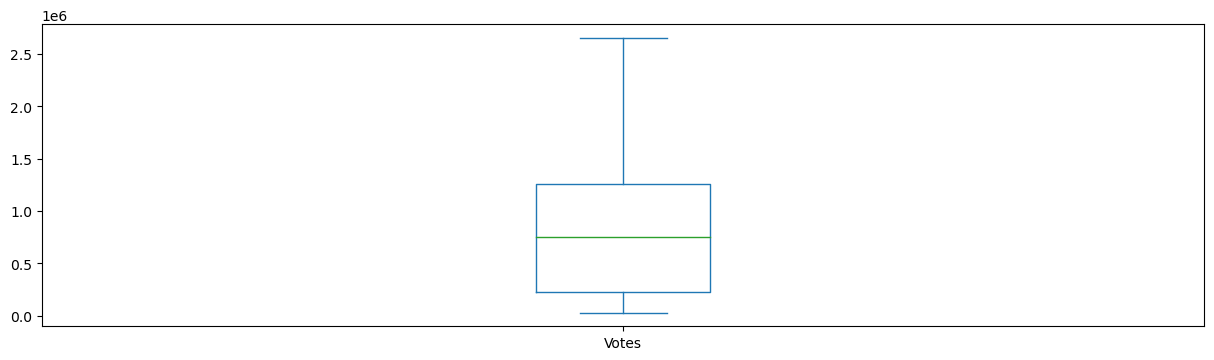

In [55]:
plt.figure(dpi = 100, figsize=(15,4))
df.groupby(['Name'])['Votes'].min().plot(kind = 'box')